In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

import cv2
import os

Using TensorFlow backend.


In [2]:
import pandas as pd

In [5]:
# Import train and test images
# Get datasets from https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/#ProblemStatement

train=pd.read_csv('/Users/Akshara/MNIST/train/train.csv')
test=pd.read_csv('/Users/Akshara/MNIST/test/test.csv')

In [6]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [7]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [11]:
# Import train and test images
train_img_path='/Users/Akshara/MNIST/Train/train/'
test_img_path='/Users/Akshara/MNIST/Test/test/'

train_img=[]

for i in train['filename']:
    img=cv2.imread(train_img_path+i,0)
    img=img/255
    train_img.append(img)
    
test_img=[]
for i in test['filename']:
    img=cv2.imread(test_img_path+i,0)
    img=img/255
    test_img.append(img)

In [12]:
train_img = np.array(train_img)
test_img = np.array(test_img)

In [13]:
train_img.shape[0]

49000

In [15]:
test_img.shape[0]

21000

In [16]:
X_data = train_img.reshape((train_img.shape[0],train_img.shape[1],
                          train_img.shape[2], 1))

In [17]:
X_data.shape

(49000, 28, 28, 1)

In [18]:
Y_data = test_img.reshape((test_img.shape[0],test_img.shape[1],
                          test_img.shape[2], 1))

In [19]:
Y_data.shape

(21000, 28, 28, 1)

In [20]:
y=train['label']
y=to_categorical(y)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size = 0.3,random_state=777)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34300, 28, 28, 1)
(14700, 28, 28, 1)
(34300, 10)
(14700, 10)


In [23]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [24]:
model = deep_cnn()

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)       

In [26]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 2)


Train on 27440 samples, validate on 6860 samples
Epoch 1/100
 - 165s - loss: 0.2470 - accuracy: 0.9205 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 2/100
 - 154s - loss: 0.0676 - accuracy: 0.9795 - val_loss: 0.0518 - val_accuracy: 0.9831
Epoch 3/100
 - 155s - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0469 - val_accuracy: 0.9854
Epoch 4/100
 - 154s - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0449 - val_accuracy: 0.9854
Epoch 5/100
 - 151s - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0469 - val_accuracy: 0.9860
Epoch 6/100
 - 153s - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0537 - val_accuracy: 0.9840
Epoch 7/100
 - 155s - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 8/100
 - 152s - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0479 - val_accuracy: 0.9870
Epoch 9/100
 - 152s - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 10/100
 - 137s - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.0518 - val_accura

Epoch 82/100
 - 143s - loss: 1.5205e-10 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9917
Epoch 83/100
 - 133s - loss: 1.4336e-10 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9917
Epoch 84/100
 - 132s - loss: 1.1730e-10 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9917
Epoch 85/100
 - 148s - loss: 1.6074e-10 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9917
Epoch 86/100
 - 135s - loss: 1.3033e-10 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9917
Epoch 87/100
 - 151s - loss: 1.4771e-10 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9915
Epoch 88/100
 - 139s - loss: 1.1295e-10 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9915
Epoch 89/100
 - 130s - loss: 1.2599e-10 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9915
Epoch 90/100
 - 141s - loss: 1.4336e-10 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9917
Epoch 91/100
 - 175s - loss: 1.1295e-10 - accuracy: 1.0000 - val_loss: 0.0936 - val_accurac

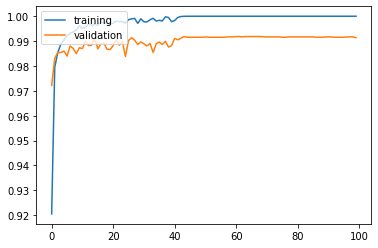

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [27]:
results = model.evaluate(X_test, y_test)

14700/14700 [==============================] - 21s 1ms/step


In [29]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9923809766769409


### Deep CNN - 2
Measures used to ameliorate the performance of MLPs are employed
- Weight Initialization
- Batch Normalization
- Dropout

In [31]:
from keras.layers import BatchNormalization, Dropout

In [32]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [33]:
model = deep_cnn_advanced()

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 50)       

In [36]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 50, verbose = 2)

Train on 27440 samples, validate on 6860 samples
Epoch 1/50
 - 430s - loss: 0.0646 - accuracy: 0.9792 - val_loss: 0.0462 - val_accuracy: 0.9892
Epoch 2/50
 - 385s - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.0452 - val_accuracy: 0.9899
Epoch 3/50
 - 386s - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0422 - val_accuracy: 0.9892
Epoch 4/50
 - 382s - loss: 0.0506 - accuracy: 0.9837 - val_loss: 0.0619 - val_accuracy: 0.9869
Epoch 5/50
 - 383s - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0590 - val_accuracy: 0.9883
Epoch 6/50
 - 387s - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0567 - val_accuracy: 0.9870
Epoch 7/50
 - 382s - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.0403 - val_accuracy: 0.9915
Epoch 8/50
 - 387s - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0343 - val_accuracy: 0.9907
Epoch 9/50
 - 385s - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0506 - val_accuracy: 0.9897
Epoch 10/50
 - 383s - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0520 - val_accuracy: 0.9910


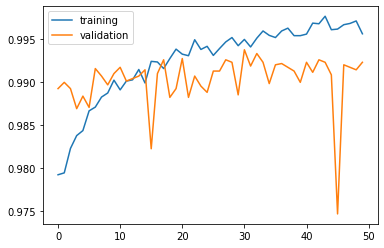

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [38]:
results = model.evaluate(X_test, y_test)

14700/14700 [==============================] - 60s 4ms/step


In [39]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9917687177658081


In [40]:
#Making prediction
prediction = model.predict_classes(Y_data)

In [41]:
# creating submission file
sample = pd.read_csv('/Users/Akshara/MNIST/sample_submission_npBPSZB.csv')
sample['label'] = prediction
sample.to_csv('/Users/Akshara/MNIST/sample_final.csv', header=True, index=False)